In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('CC GENERAL.csv')

# Melihat beberapa baris awal dari dataset
print(df.head())

# Melihat informasi umum tentang dataset
print(df.info())

# Statistik deskriptif untuk memahami distribusi data
print(df.describe())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [39]:
# Mengisi nilai yang hilang di kolom 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENTS' dengan nilai rata-rata
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

# Memastikan tidak ada nilai yang hilang lagi
print(df.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [40]:
from sklearn.preprocessing import StandardScaler

# Menghapus kolom non-numerik atau kolom identifier (misalnya, 'CUST_ID')
df_processed = df.drop(columns=['CUST_ID'])

# Melakukan scaling pada data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)

# Mengubah hasil scaling kembali ke DataFrame untuk kemudahan penggunaan
df_scaled = pd.DataFrame(df_scaled, columns=df_processed.columns)


In [41]:
from sklearn.cluster import KMeans

# Inisialisasi model K-Means dengan jumlah klaster k (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting model ke data yang sudah di-scale
kmeans.fit(df_scaled)

# Menambahkan label klaster ke dataset asli
df['Cluster'] = kmeans.labels_

# Melihat hasil klastering
print(df.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

c:\Users\SAFA SEFIERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\SAFA SEFIERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SAFA SEFIERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SAFA SEFIERA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SAFA SEFIERA\AppData\Local\Programs\Python\Python311\Li

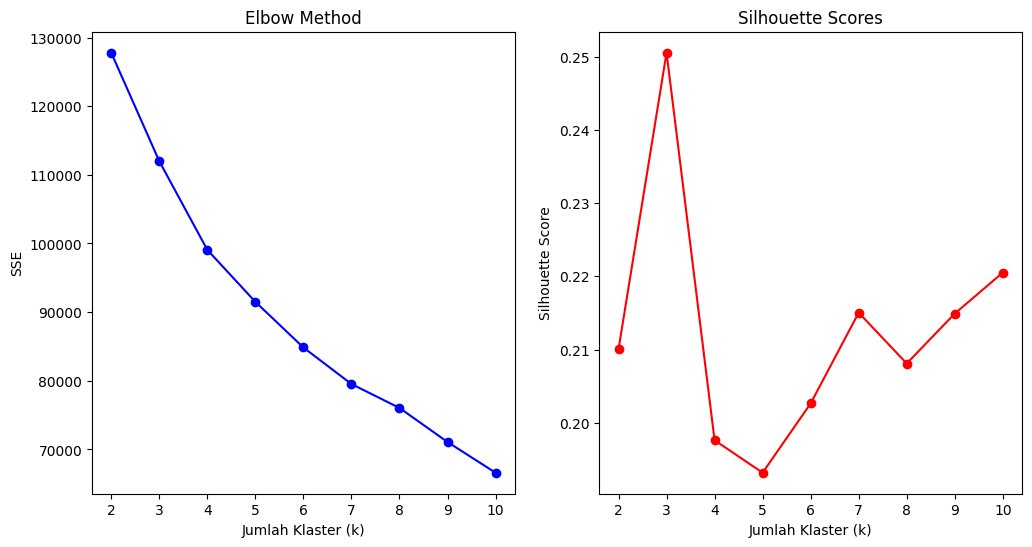

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Menentukan jumlah klaster optimal menggunakan metode Elbow dan Silhouette
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting hasil Elbow Method dan Silhouette Scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.show()


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        3989.326804           0.957980   384.528277        248.718133   
1        2220.003291           0.981477  4268.520980       2717.828543   
2         799.702576           0.835188   505.532394        253.120131   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    135.887632   3869.856855             0.232290   
1                   1551.178267    458.421147             0.949093   
2                    252.733061    329.866776             0.465072   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.110942                          0.144242   
1                          0.668166                        

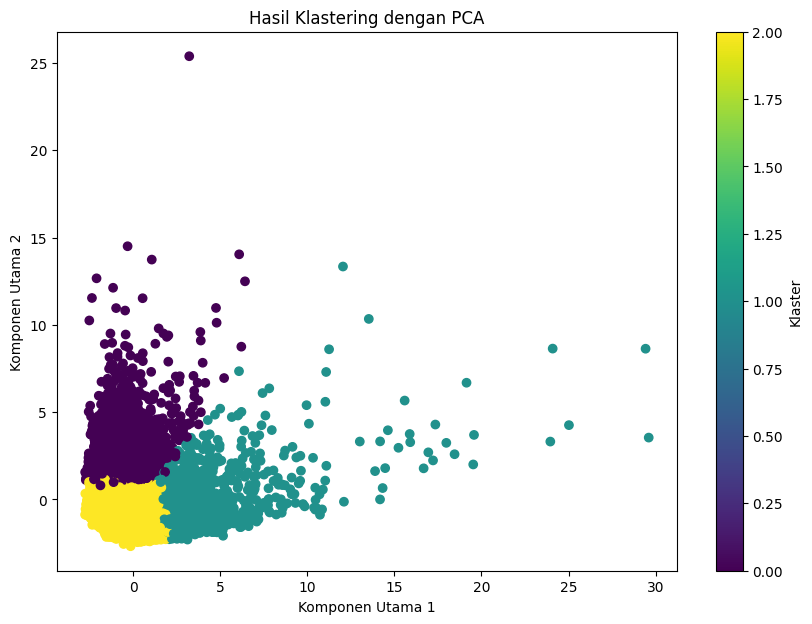

In [43]:
# Pastikan hanya kolom numerik yang digunakan dalam penghitungan rata-rata
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Mengelompokkan berdasarkan klaster dan menghitung rata-rata untuk kolom numerik saja
cluster_means = df.groupby('Cluster')[numerical_columns].mean()
print(cluster_means)

# Menganalisis hasil klastering dengan melihat sebaran klaster menggunakan PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Lakukan PCA pada data yang sudah di-scale
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

# Visualisasi hasil klastering
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Hasil Klastering dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Klaster')
plt.show()


In [44]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Misalkan 'df_scaled' adalah data yang sudah di-scale dan 'df['Cluster']' adalah hasil klasterisasi

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, df['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Menghitung Calinski-Harabasz Index
ch_index = calinski_harabasz_score(df_scaled, df['Cluster'])
print(f'Calinski-Harabasz Index: {ch_index:.4f}')


Silhouette Score: 0.2506
Davies-Bouldin Index: 1.5973
Calinski-Harabasz Index: 1604.3967


In [58]:
import pickle

# Simpan model KMeans ke dalam file pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Simpan scaler juga karena data baru nantinya harus di-scale dengan cara yang sama
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
